In [74]:
from random import random
from pandas import Series, DataFrame
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [75]:
countries = pd.read_csv("time_series_covid_19_confirmed.csv") #SM
testing_ga = pd.read_csv("georgia-history.csv")
#--------------------------------------------
testing_usa = pd.read_csv("all-states-history.csv") #AD
hospitalization_beds = pd.read_csv("reported_hospital_utilization_timeseries_20201129_2141.csv") #AD
#-------------------------------------------
data = pd.read_csv("covid_19_data.csv") #G
#-------------------------------------------
covid_data = pd.read_csv("covid19_data.csv") #PN
covid_traffic = pd.read_csv("covid_impact_on_airport_traffic.csv")

### Covid-19 Tracking_Project

# Part 1

In [76]:
countries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,41975,42033,42092,42297,42463,42609,42795,42969,43035,43240
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,23210,23705,24206,24731,25294,25801,26211,26701,27233,27830
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,60800,61381,62051,62693,63446,64257,65108,65975,66819,67679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5135,5319,5383,5437,5477,5567,5616,5725,5725,5872
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,12223,12335,12433,12680,12816,12953,13053,13228,13374,13451


In [77]:
countries['Country/Region'].count()

269

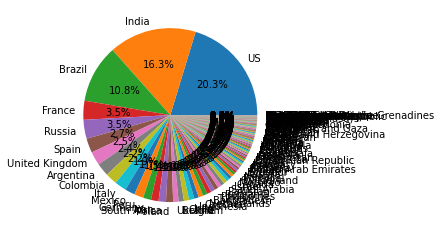

In [78]:
#filtering
world = countries[["Country/Region","11/15/20"]] 
world = DataFrame(world.groupby(["Country/Region"])["11/15/20"].sum()) 
world = world.sort_values(by='11/15/20',ascending=False) 
values = world['11/15/20']
labels = world.index.values
plt.pie(values, labels=labels, autopct="%.1f%%");

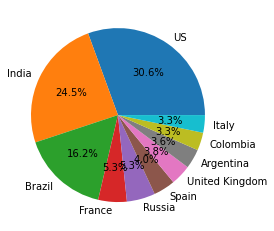

In [79]:
#filtering
world = countries[["Country/Region","11/15/20"]] 
world = DataFrame(world.groupby(["Country/Region"])["11/15/20"].sum()) 
world = world.sort_values(by='11/15/20',ascending=False) 
col2 = world[0:10] 
values = col2['11/15/20']
labels = col2.index.values
plt.pie(values, labels=labels, autopct="%.1f%%");

In [80]:
# Percentage of cases by each country
world['Percentage'] = (world / world.sum()) * 100
world

,11/15/20,Percentage
Country/Region,,
US,11036935,20.299609
India,8845127,16.268341
Brazil,5863093,10.783654
France,1915713,3.523462
Russia,1910149,3.513229
...,...,...
Solomon Islands,16,0.000029
Western Sahara,10,0.000018
MS Zaandam,9,0.000017


# Focusing on USA

In [81]:
ustestcases = pd.read_csv("time_series_covid_19_confirmed_US.csv")
# deleting columns that i dont need
ustestcases = ustestcases.drop(['UID', 'iso2','iso3','code3','FIPS','Admin2','Country_Region','Lat','Long_'], axis=1)
#combined key is a column which basically the counties 
ustestcases = ustestcases.rename(columns={"Combined_Key": "County"})
ustestcases


,Province_State,County,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,Alabama,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,...,2242,2267,2283,2304,2328,2351,2385,2417,2435,2456
1,Alabama,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,...,7134,7188,7226,7263,7348,7409,7454,7523,7596,7646
2,Alabama,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,...,1090,1092,1095,1098,1107,1112,1113,1117,1123,1128
3,Alabama,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,...,917,924,926,932,948,961,966,973,978,986
4,Alabama,"Blount, Alabama, US",0,0,0,0,0,0,0,0,...,2253,2286,2297,2335,2378,2400,2429,2488,2518,2549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,Wyoming,"Teton, Wyoming, US",0,0,0,0,0,0,0,0,...,922,932,977,1007,1022,1025,1066,1108,1156,1178
3336,Wyoming,"Uinta, Wyoming, US",0,0,0,0,0,0,0,0,...,542,544,551,568,614,627,664,686,719,729
3337,Wyoming,"Unassigned, Wyoming, US",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3338,Wyoming,"Washakie, Wyoming, US",0,0,0,0,0,0,0,0,...,188,185,187,190,197,199,203,206,208,218


In [82]:
#Grouping by State and counting the latest cases within the state
ustests = DataFrame(ustestcases.groupby(["Province_State"])["11/15/20"].sum()) 
ustests = ustests.sort_values(by='11/15/20',ascending=False) 
#Ascending orders
ustests

,11/15/20
Province_State,
Texas,1059753
California,1032095
Florida,885201
Illinois,573616
New York,560200
Georgia,424989
Wisconsin,329924
North Carolina,312235
Tennessee,310937


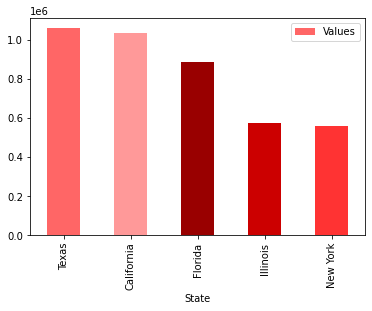

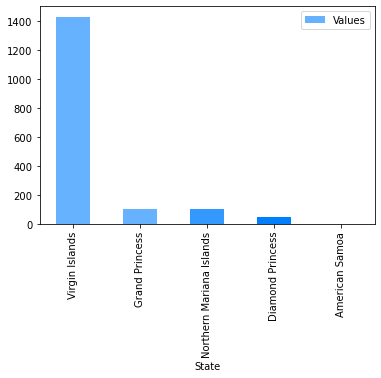

In [88]:
values_state = ustests['11/15/20']
state_name = ustests.index.values
df = pd.DataFrame({'Values': values_state,
                   'State': state_name})
# First 5 States  
ax = df.head().plot.bar(x='State', y='Values', color=['#FF6666','#FF9999','#990000','#CC0000','#FF3333'])

# last 5 States
yx = df.tail().plot.bar(x='State', y='Values', color=['#66B2FF','#66B2FF','#3399FF','#0080FF','#0000CC'])

In [13]:
#getting all the couties in Ga
ustestcases = pd.DataFrame(ustestcases)
ustestcases = ustestcases.loc[ustestcases["Province_State"] == "Georgia"]
ustestcases = ustestcases.reset_index(drop=True)
ustestcases

,Province_State,County,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
0,Georgia,"Appling, Georgia, US",0,0,0,0,0,0,0,0,...,1277,1278,1285,1286,1289,1289,1295,1301,1296,1301
1,Georgia,"Atkinson, Georgia, US",0,0,0,0,0,0,0,0,...,545,545,547,548,549,550,553,556,558,559
2,Georgia,"Bacon, Georgia, US",0,0,0,0,0,0,0,0,...,717,720,725,726,727,727,728,730,732,732
3,Georgia,"Baker, Georgia, US",0,0,0,0,0,0,0,0,...,113,113,116,117,117,116,119,119,119,119
4,Georgia,"Baldwin, Georgia, US",0,0,0,0,0,0,0,0,...,2454,2463,2467,2480,2491,2499,2502,2519,2527,2529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Georgia,"Whitfield, Georgia, US",0,0,0,0,0,0,0,0,...,6030,6100,6152,6205,6241,6295,6434,6538,6615,6741
157,Georgia,"Wilcox, Georgia, US",0,0,0,0,0,0,0,0,...,327,327,327,327,331,333,334,335,335,336
158,Georgia,"Wilkes, Georgia, US",0,0,0,0,0,0,0,0,...,358,358,365,367,371,374,378,389,393,396
159,Georgia,"Wilkinson, Georgia, US",0,0,0,0,0,0,0,0,...,394,397,398,402,401,402,403,408,412,412


In [14]:
# Now we are focusing on Georgia
print("Georgia's cases")
ustests.loc["Georgia","11/15/20"]

Georgia's cases


424989

In [15]:
# Higest County in Ga
df = ustestcases.set_index('County')
df[df['11/15/20'] == df['11/15/20'].max()]

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20
County,,,,,,,,,,,,,,,,,,,,,
"Fulton, Georgia, US",Georgia,0,0,0,0,0,0,0,0,0,...,34525,34644,34833,34946,35322,35500,35756,35994,36266,36425


In [16]:
#Total Case in Fulton Georgia
df['11/15/20'].max()

36425

In [18]:
testing_ga

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-29,GA,A+,9442.0,8778.0,18,664.0,34782.0,34782.0,2493.0,...,4302927,13903,362982.0,NaN,NaN,NaN,NaN,0,4302927,13903
1,2020-11-28,GA,A+,9424.0,8775.0,44,649.0,34724.0,34724.0,2370.0,...,4289024,30611,362341.0,NaN,NaN,NaN,NaN,0,4289024,30611
2,2020-11-27,GA,A+,9380.0,8746.0,44,634.0,34605.0,34605.0,2295.0,...,4258413,31722,361442.0,NaN,NaN,NaN,NaN,0,4258413,31722
3,2020-11-26,GA,A+,9336.0,8716.0,39,620.0,34587.0,34587.0,2247.0,...,4226691,30762,359818.0,NaN,NaN,NaN,NaN,0,4226691,30762
4,2020-11-25,GA,A+,9297.0,8694.0,76,603.0,34413.0,34413.0,2286.0,...,4195929,21986,358749.0,NaN,NaN,NaN,NaN,0,4195929,21986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,2020-03-08,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
267,2020-03-07,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
268,2020-03-06,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
269,2020-03-05,GA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0


In [20]:
# False = > 5%  = We are undertesting
# True = < 5% = We are testing the right amount of people
#According to criteria published by WHO in May, a positive rate of less than 5% is 
#one indicator that the testing is under control in a country.
testing_ga1 = testing_ga[["date","positiveIncrease","totalTestResultsIncrease"]].copy()
testing_ga1["Percentage"] = ((testing_ga['positiveIncrease'] / testing_ga['totalTestResultsIncrease']) * 100)
testing_ga1 = testing_ga1.replace(np.inf, np.nan)
testing_ga1 = testing_ga1.dropna()
testing_ga1["Pass/Fail"] = testing_ga1["Percentage"] < 5
testing_ga1

,date,positiveIncrease,totalTestResultsIncrease,Percentage,Pass/Fail
0,2020-11-29,1665,13903,11.975833,False
1,2020-11-28,2633,30611,8.601483,False
2,2020-11-27,2394,31722,7.546813,False
3,2020-11-26,2907,30762,9.449971,False
4,2020-11-25,2358,21986,10.725007,False
...,...,...,...,...,...
261,2020-03-13,11,255,4.313725,True
262,2020-03-12,9,37,24.324324,False
263,2020-03-11,5,15,33.333333,False
264,2020-03-10,5,23,21.739130,False


In [21]:
#Total Days 
testing_ga1["Pass/Fail"].count()

266

In [22]:
testing_ga1[testing_ga1['Pass/Fail'] == True]

,date,positiveIncrease,totalTestResultsIncrease,Percentage,Pass/Fail
41,2020-10-19,752,15821,4.753176,True
56,2020-10-04,847,17237,4.913848,True
57,2020-10-03,1444,31368,4.603417,True
62,2020-09-28,596,12229,4.873661,True
175,2020-06-07,589,12007,4.905472,True
176,2020-06-06,688,15070,4.565362,True
182,2020-05-31,700,30561,2.290501,True
188,2020-05-25,506,21337,2.371467,True
189,2020-05-24,706,16663,4.236932,True
195,2020-05-18,380,9329,4.073320,True


In [23]:
testing_ga1[testing_ga1['Pass/Fail'] == False]

,date,positiveIncrease,totalTestResultsIncrease,Percentage,Pass/Fail
0,2020-11-29,1665,13903,11.975833,False
1,2020-11-28,2633,30611,8.601483,False
2,2020-11-27,2394,31722,7.546813,False
3,2020-11-26,2907,30762,9.449971,False
4,2020-11-25,2358,21986,10.725007,False
...,...,...,...,...,...
260,2020-03-14,24,130,18.461538,False
262,2020-03-12,9,37,24.324324,False
263,2020-03-11,5,15,33.333333,False
264,2020-03-10,5,23,21.739130,False


In [24]:
# False > 5%  = We are undertesting
# True < 5% = We are testing the right amount of people
testing_ga1["Pass/Fail"].value_counts()

False    248
True      18
Name: Pass/Fail, dtype: int64

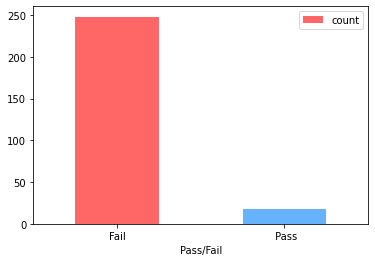

In [91]:
#In Ga we are not testing the right amount of people

true = len(testing_ga1[testing_ga1["Pass/Fail"] == True])
false = len(testing_ga1[testing_ga1["Pass/Fail"] == False])
df = pd.DataFrame({'Pass/Fail':['Fail',' Pass'], 'count':[false,true]})
ax = df.plot.bar(x='Pass/Fail', y='count', rot=0,color= ["#FF6666","#66B2FF"])

# Fact number 1 (I conclude that Ga is an undertesting state for COVID-19)


# Part 2

In [26]:
testing_usa

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-11-29,AK,A,121.0,121.0,0,NaN,722.0,722.0,159.0,...,1006180.0,7126,NaN,NaN,NaN,NaN,NaN,0,1006180.0,7126
1,2020-11-29,AL,A,3577.0,3245.0,5,332.0,24670.0,24670.0,1609.0,...,1579713.0,5811,NaN,NaN,71698.0,NaN,NaN,0,1579713.0,5811
2,2020-11-29,AR,A+,2470.0,2265.0,21,205.0,8843.0,8843.0,1030.0,...,1675828.0,10243,NaN,21856.0,NaN,135709.0,NaN,0,1675828.0,10243
3,2020-11-29,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-11-29,AZ,A+,6634.0,6148.0,10,486.0,25568.0,25568.0,2458.0,...,2236325.0,18441,363824.0,NaN,NaN,NaN,2236325.0,18441,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15236,2020-01-24,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
15237,2020-01-23,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,2.0,1,NaN,NaN,NaN,NaN,NaN,0,2.0,1
15238,2020-01-23,WA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
15239,2020-01-22,MA,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,1.0,1


In [28]:
chances_hospitalization = testing_usa[['state', 'date', 'positive', 'hospitalizedIncrease']]
chances_hospitalization

,state,date,positive,hospitalizedIncrease
0,AK,2020-11-29,30816.0,1
1,AL,2020-11-29,247229.0,0
2,AR,2020-11-29,156247.0,24
3,AS,2020-11-29,0.0,0
4,AZ,2020-11-29,325995.0,220
...,...,...,...,...
15236,WA,2020-01-24,0.0,0
15237,MA,2020-01-23,NaN,0
15238,WA,2020-01-23,0.0,0
15239,MA,2020-01-22,NaN,0


In [29]:
#chances_hospitalization = chances_hospitalization.where(chances_hospitalization['date']=='2020-11-27').fillna(0).copy()
chances_hospitalization1 = chances_hospitalization.groupby(['state']).agg({'hospitalizedIncrease': np.sum}).rename(columns={'hospitalizedIncrease': 'Total Hospoitalization For Each State'})
chances_hospitalization1['Total Hospoitalization For Each State']

state
AK      722
AL    24670
AR     8843
AS        0
AZ    25564
CA        0
CO    13428
CT    12257
DC        0
DE        0
FL    55393
GA    34782
GU        0
HI     1287
IA        0
ID     3948
IL        0
IN    25632
KS     5018
KY     9981
LA        0
MA    14139
MD    20877
ME      692
MI        0
MN    16643
MO        0
MP        4
MS     7294
MT     2569
NC        0
ND     2667
NE     4246
NH      839
NJ    41213
NM     6680
NV        0
NY    89995
OH    26507
OK    12221
OR     4343
PA        0
PR        0
RI     4408
SC    11857
SD     4468
TN    12040
TX        0
UT     8076
VA    25690
VI        0
VT        0
WA    10663
WI    16999
WV        0
WY      762
Name: Total Hospoitalization For Each State, dtype: int64

In [30]:
#I need to get total postive tests for each state and add to column
positives = testing_usa[testing_usa['date'] == '2020-11-29'].fillna(0).copy()
positives = positives[['state','positive']]
positives= positives.set_index('state')
#I combined the two dataframes to 
#left − A DataFrame object.
#right − Another DataFrame object.
ps1 = pd.merge(positives, chances_hospitalization1,left_index=True, right_index=True)
ps1

,positive,Total Hospoitalization For Each State
state,,
AK,30816.0,722
AL,247229.0,24670
AR,156247.0,8843
AS,0.0,0
AZ,325995.0,25564
CA,1198934.0,0
CO,228772.0,13428
CT,112581.0,12257
DC,21448.0,0


,positive,Total Hospoitalization For Each State,Chances Of Hospitalization
state,,,
NY,641161.0,89995,14.036256
NJ,334114.0,41213,12.335011
VA,235942.0,25690,10.888269
CT,112581.0,12257,10.887272
MD,196447.0,20877,10.627294
AL,247229.0,24670,9.978603
GA,420601.0,34782,8.269595
RI,53954.0,4408,8.169923
AZ,325995.0,25564,7.841838


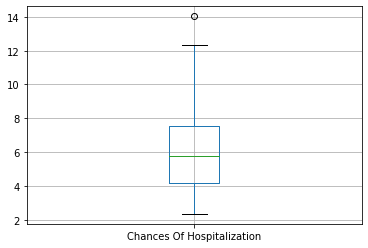

In [31]:
# New column for Chances of Hospitalization
ps1['Chances Of Hospitalization'] = (ps1['Total Hospoitalization For Each State']/ps1['positive']) * 100
# Sorted the chances or percentage of being hospitalized
ps1 = ps1.sort_values(by='Chances Of Hospitalization', ascending=False)
#Whichever data was relavent or percentage over 0 I included.
ps1 = ps1[ps1['Chances Of Hospitalization'] > 0].copy()
boxplot = DataFrame(ps1['Chances Of Hospitalization']).boxplot()
ps1
# Most state hospitalization was between 4 and 7.9 percent
#Show the 5 lowest state of getting hospitalized

# Fact number 2 :
## 50% of the nations chance of getting hospitalized is between 4% and 6.7%.



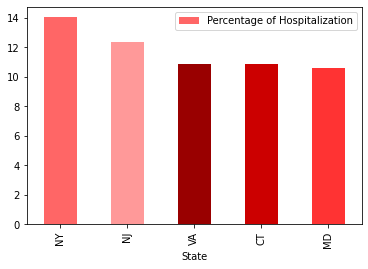

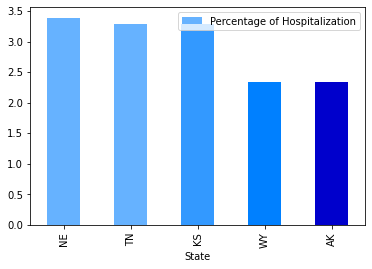

In [87]:
value_Hospital = ps1['Chances Of Hospitalization']
#state = DataFrame('state',ps1.index.values)
state_Name = ps1.index.values
df = pd.DataFrame({"Percentage of Hospitalization": value_Hospital,
                  "State": state_Name})
#First 5 state 
ax = df.head().plot.bar(x="State", y="Percentage of Hospitalization", color=['#FF6666','#FF9999','#990000','#CC0000','#FF3333'])

#last 5 state 
bx = df.tail().plot.bar(x="State", y="Percentage of Hospitalization", color=['#66B2FF','#66B2FF','#3399FF','#0080FF','#0000CC'])


In [33]:
hospitalization_beds

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator
0,NE,2020-08-20,10,69,7,13,66,7,0.0,75,...,180.0,5139.0,0.083691,67.0,39.0,466.0,0.688925,79.0,423.0,614.0
1,NH,2020-08-20,4,25,1,4,24,2,1.0,30,...,45.0,3272.0,0.040000,26.0,11.0,275.0,0.552727,26.0,152.0,275.0
2,NJ,2020-08-20,10,61,6,10,62,5,29.0,70,...,192.0,1751.0,0.000000,10.0,0.0,12.0,0.522727,11.0,23.0,44.0
3,NM,2020-08-20,12,35,2,10,37,2,1.0,48,...,113.0,3333.0,0.095607,43.0,37.0,387.0,0.662592,44.0,271.0,409.0
4,NV,2020-08-20,6,49,6,10,45,6,45.0,59,...,877.0,8298.0,0.301008,58.0,239.0,794.0,0.733179,61.0,632.0,862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14740,MN,2020-01-01,0,0,1,0,0,1,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14741,MT,2020-01-01,0,0,1,0,0,1,0.0,1,...,0.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14742,NC,2020-01-01,0,0,1,0,0,1,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14743,PR,2020-01-01,0,0,1,0,0,1,0.0,1,...,0.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
columns_to_keep = ['state',
                  'date',
                  'inpatient_beds',
                  'inpatient_beds_used',
                  'inpatient_beds_used_covid']

hospitalization_beds = hospitalization_beds[columns_to_keep].fillna(0)
hospitalization_beds

,state,date,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid
0,NE,2020-08-20,5242.0,3279.0,180.0
1,NH,2020-08-20,3272.0,2212.0,45.0
2,NJ,2020-08-20,19455.0,15046.0,192.0
3,NM,2020-08-20,3568.0,2253.0,113.0
4,NV,2020-08-20,8472.0,6007.0,877.0
...,...,...,...,...,...
14740,MN,2020-01-01,46.0,0.0,0.0
14741,MT,2020-01-01,36.0,12.0,0.0
14742,NC,2020-01-01,72.0,0.0,0.0
14743,PR,2020-01-01,146.0,61.0,0.0


In [35]:
# Hospitalization Usage Rate
hospitalization_beds['Hospitalization Usage Rate'] = (hospitalization_beds['inpatient_beds_used']
                                                      /hospitalization_beds['inpatient_beds'])*100
# Hospitalization Usage of Covid Rate
hospitalization_beds['Hospitalization Usage of Covid Rate'] = (hospitalization_beds['inpatient_beds_used_covid']
                                                      /hospitalization_beds['inpatient_beds'])*100

hospitalization_beds.groupby(['state']).agg({'Hospitalization Usage Rate': np.average}).sort_values(by='Hospitalization Usage Rate', ascending=False)

,Hospitalization Usage Rate
state,
RI,82.613109
MD,76.937264
AZ,76.392907
NY,74.138157
NC,73.067913
DC,72.825193
WA,72.584165
MA,72.029363
SC,71.519250


In [36]:
# These are the states that went over the hospitality capacity
states_that_went_over = hospitalization_beds[hospitalization_beds['Hospitalization Usage Rate'] > 100]
#states_that_went_over
states_to_Keep = list(states_that_went_over['state'].unique())
states_to_Keep

['RI', 'HI', 'AZ', 'NM', 'NY', 'LA', 'CT', 'OK', 'TN', 'VI', 'PR', 'VA', 'WA']

# Fact number 3 :
## The states above went over 100% capacity over any given day between 01/01/20 and 11/29/30


# Part 3

In [37]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
156287,156288,11/15/2020,Zaporizhia Oblast,Ukraine,2020-11-16 05:25:57,18484.0,164.0,3021.0
156288,156289,11/15/2020,Zeeland,Netherlands,2020-11-16 05:25:57,5041.0,86.0,0.0
156289,156290,11/15/2020,Zhejiang,Mainland China,2020-11-16 05:25:57,1291.0,1.0,1279.0
156290,156291,11/15/2020,Zhytomyr Oblast,Ukraine,2020-11-16 05:25:57,22225.0,368.0,12266.0


In [38]:
data['Month'] = pd.DatetimeIndex(data['ObservationDate']).month
data 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Month
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,1
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,1
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
156287,156288,11/15/2020,Zaporizhia Oblast,Ukraine,2020-11-16 05:25:57,18484.0,164.0,3021.0,11
156288,156289,11/15/2020,Zeeland,Netherlands,2020-11-16 05:25:57,5041.0,86.0,0.0,11
156289,156290,11/15/2020,Zhejiang,Mainland China,2020-11-16 05:25:57,1291.0,1.0,1279.0,11
156290,156291,11/15/2020,Zhytomyr Oblast,Ukraine,2020-11-16 05:25:57,22225.0,368.0,12266.0,11


In [39]:
newData = data.drop(['SNo','Last Update','Deaths','Recovered'], axis = 1)
newData #Dropped Irrelevant Columns

,ObservationDate,Province/State,Country/Region,Confirmed,Month
0,01/22/2020,Anhui,Mainland China,1.0,1
1,01/22/2020,Beijing,Mainland China,14.0,1
2,01/22/2020,Chongqing,Mainland China,6.0,1
3,01/22/2020,Fujian,Mainland China,1.0,1
4,01/22/2020,Gansu,Mainland China,0.0,1
...,...,...,...,...,...
156287,11/15/2020,Zaporizhia Oblast,Ukraine,18484.0,11
156288,11/15/2020,Zeeland,Netherlands,5041.0,11
156289,11/15/2020,Zhejiang,Mainland China,1291.0,11
156290,11/15/2020,Zhytomyr Oblast,Ukraine,22225.0,11


In [40]:
a = newData.sort_values(by = 'Confirmed')
a 
#Most important value to look for our fact is cofrimed cases
#Sorted the values to see what data is in the 'Confirmed' column

,ObservationDate,Province/State,Country/Region,Confirmed,Month
146493,11/02/2020,Unknown,Colombia,-302844.0,11
10320,03/30/2020,Recovered,Canada,0.0,3
142028,10/27/2020,Unknown,Peru,0.0,10
142029,10/27/2020,Unknown,Spain,0.0,10
142030,10/27/2020,Unknown,UK,0.0,10
...,...,...,...,...,...
152569,11/11/2020,NaN,France,1867721.0,11
153314,11/12/2020,NaN,France,1867721.0,11
154072,11/13/2020,NaN,France,1867721.0,11
154830,11/14/2020,NaN,France,1867721.0,11


In [41]:
check = newData[newData['Confirmed'] < 0]
check
#Look for negative values within 'Confirmed' column as it is irrelevant

,ObservationDate,Province/State,Country/Region,Confirmed,Month
146493,11/02/2020,Unknown,Colombia,-302844.0,11


In [42]:
check2 = newData[newData['Confirmed'] <= 0]
check2
#Looked for negative and zero values within 'Confirmed' column as it is also irrelevant

,ObservationDate,Province/State,Country/Region,Confirmed,Month
4,01/22/2020,Gansu,Mainland China,0.0,1
10,01/22/2020,Heilongjiang,Mainland China,0.0,1
12,01/22/2020,Hong Kong,Hong Kong,0.0,1
15,01/22/2020,Inner Mongolia,Mainland China,0.0,1
18,01/22/2020,Jilin,Mainland China,0.0,1
...,...,...,...,...,...
156231,11/15/2020,Unknown,India,0.0,11
156233,11/15/2020,Unknown,Mexico,0.0,11
156235,11/15/2020,Unknown,Peru,0.0,11
156236,11/15/2020,Unknown,Spain,0.0,11


In [43]:
b = newData[newData['Confirmed'] > 0]
b

#Valid data we need for data

,ObservationDate,Province/State,Country/Region,Confirmed,Month
0,01/22/2020,Anhui,Mainland China,1.0,1
1,01/22/2020,Beijing,Mainland China,14.0,1
2,01/22/2020,Chongqing,Mainland China,6.0,1
3,01/22/2020,Fujian,Mainland China,1.0,1
5,01/22/2020,Guangdong,Mainland China,26.0,1
...,...,...,...,...,...
156287,11/15/2020,Zaporizhia Oblast,Ukraine,18484.0,11
156288,11/15/2020,Zeeland,Netherlands,5041.0,11
156289,11/15/2020,Zhejiang,Mainland China,1291.0,11
156290,11/15/2020,Zhytomyr Oblast,Ukraine,22225.0,11


In [44]:
c = b[(b['ObservationDate'] >= '05/01/2020')]
c
#Filtered the data after April to get rid of unnecessary data values
#Most counties especially top tourist places started recording cases in April - May
#Looked for three of the top tourist places outside the US in North America 

,ObservationDate,Province/State,Country/Region,Confirmed,Month
20251,05/01/2020,NaN,Afghanistan,2335.0,5
20252,05/01/2020,NaN,Albania,782.0,5
20253,05/01/2020,NaN,Algeria,4154.0,5
20254,05/01/2020,NaN,Andorra,745.0,5
20255,05/01/2020,NaN,Angola,30.0,5
...,...,...,...,...,...
156287,11/15/2020,Zaporizhia Oblast,Ukraine,18484.0,11
156288,11/15/2020,Zeeland,Netherlands,5041.0,11
156289,11/15/2020,Zhejiang,Mainland China,1291.0,11
156290,11/15/2020,Zhytomyr Oblast,Ukraine,22225.0,11


In [45]:
d = c[(c['Country/Region'] == 'Mexico')]
d

#Retrived data from the Mexico Region

,ObservationDate,Province/State,Country/Region,Confirmed,Month
20359,05/01/2020,NaN,Mexico,20739.0,5
20682,05/02/2020,NaN,Mexico,22088.0,5
21005,05/03/2020,NaN,Mexico,23471.0,5
21328,05/04/2020,NaN,Mexico,24905.0,5
21651,05/05/2020,NaN,Mexico,26025.0,5
...,...,...,...,...,...
156193,11/15/2020,Tamaulipas,Mexico,33668.0,11
156206,11/15/2020,Tlaxcala,Mexico,8768.0,11
156253,11/15/2020,Veracruz,Mexico,38321.0,11
156281,11/15/2020,Yucatan,Mexico,22683.0,11


In [46]:
e = c[c['Province/State'] == 'Quintana Roo']
e

#Retrived data from the Quintana Roo region because Cancun is one of the most biggest tourist places in Mexico

,ObservationDate,Province/State,Country/Region,Confirmed,Month
27093,05/20/2020,Quintana Roo,Mexico,1392.0,5
27545,05/21/2020,Quintana Roo,Mexico,1450.0,5
27997,05/22/2020,Quintana Roo,Mexico,1530.0,5
28449,05/23/2020,Quintana Roo,Mexico,1580.0,5
28901,05/24/2020,Quintana Roo,Mexico,1609.0,5
...,...,...,...,...,...
153098,11/11/2020,Quintana Roo,Mexico,13775.0,11
153852,11/12/2020,Quintana Roo,Mexico,13811.0,11
154610,11/13/2020,Quintana Roo,Mexico,13835.0,11
155368,11/14/2020,Quintana Roo,Mexico,13885.0,11


In [47]:
group = e.groupby('Month').agg({'Confirmed':np.max})
group

#Take the max becasue of confimed cases are added up and stoped at the max of each month 

,Confirmed
Month,
5,1882.0
6,3619.0
7,7693.0
8,10313.0
9,11849.0
10,13491.0
11,13899.0


In [48]:
f = c.drop(['Province/State'], axis = 1)
f

#Droped the 'Province/State' column due null values in Jamaica and Bahamas

,ObservationDate,Country/Region,Confirmed,Month
20251,05/01/2020,Afghanistan,2335.0,5
20252,05/01/2020,Albania,782.0,5
20253,05/01/2020,Algeria,4154.0,5
20254,05/01/2020,Andorra,745.0,5
20255,05/01/2020,Angola,30.0,5
...,...,...,...,...
156287,11/15/2020,Ukraine,18484.0,11
156288,11/15/2020,Netherlands,5041.0,11
156289,11/15/2020,Mainland China,1291.0,11
156290,11/15/2020,Ukraine,22225.0,11


In [49]:
g = f[f['Country/Region'] == 'Bahamas']
g 

#repeated

,ObservationDate,Country/Region,Confirmed,Month
20261,05/01/2020,Bahamas,81.0,5
20584,05/02/2020,Bahamas,83.0,5
20907,05/03/2020,Bahamas,83.0,5
21230,05/04/2020,Bahamas,83.0,5
21553,05/05/2020,Bahamas,89.0,5
...,...,...,...,...
152524,11/11/2020,Bahamas,7060.0,11
153270,11/12/2020,Bahamas,7124.0,11
154028,11/13/2020,Bahamas,7163.0,11
154786,11/14/2020,Bahamas,7163.0,11


In [50]:
group2 = g.groupby('Month').agg({'Confirmed' : np.max})
group2

,Confirmed
Month,
5,102.0
6,104.0
7,574.0
8,2217.0
9,4123.0
10,6714.0
11,7186.0


In [51]:
h = f[f['Country/Region'] == 'Jamaica']
h

,ObservationDate,Country/Region,Confirmed,Month
20334,05/01/2020,Jamaica,432.0,5
20657,05/02/2020,Jamaica,463.0,5
20980,05/03/2020,Jamaica,469.0,5
21303,05/04/2020,Jamaica,471.0,5
21626,05/05/2020,Jamaica,473.0,5
...,...,...,...,...
152591,11/11/2020,Jamaica,9581.0,11
153336,11/12/2020,Jamaica,9634.0,11
154094,11/13/2020,Jamaica,9723.0,11
154852,11/14/2020,Jamaica,9780.0,11


In [52]:
group3 = h.groupby('Month').agg({'Confirmed': np.max})
group3

,Confirmed
Month,
5,586.0
6,702.0
7,878.0
8,2459.0
9,6482.0
10,9094.0
11,9884.0


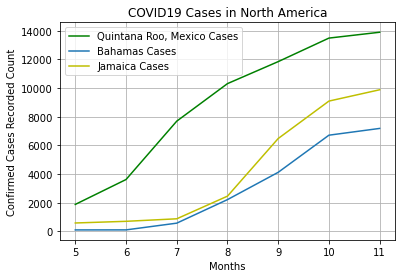

In [66]:
%matplotlib inline
x = group['Confirmed']
y = group2['Confirmed']
z = group3['Confirmed']
import matplotlib.pyplot as plt
xis = plt.axes()
xis.grid()
xLine = plt.plot(x, 'g')
yLine = plt.plot(y)
zLine = plt.plot(z, 'y')
plt.title('COVID19 Cases in North America')
plt.xlabel("Months")
plt.ylabel("Confirmed Cases Recorded Count")
plt.legend(['Quintana Roo, Mexico Cases','Bahamas Cases', 'Jamaica Cases'], loc = 2)
plt.show()

# Fact number 4:
## Through the months of May to August is saftest to travel
#Because of Spike in cases in the month of August in all three countries and states proves that from August to November is most risky to travel.
#This also that between august and november that cases surge due to the north american colder whether and hurricanse season in the transition from fall to winter.
#It alos shows that Quintina Roo, Mexico is more riskier to travel than Jamaica and Bahamas due to population and risk of forign infections.

# Part 4 


In [55]:
covid_data #Viewing the data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
156287,156288,11/15/2020,Zaporizhia Oblast,Ukraine,2020-11-16 05:25:57,18484.0,164.0,3021.0
156288,156289,11/15/2020,Zeeland,Netherlands,2020-11-16 05:25:57,5041.0,86.0,0.0
156289,156290,11/15/2020,Zhejiang,Mainland China,2020-11-16 05:25:57,1291.0,1.0,1279.0
156290,156291,11/15/2020,Zhytomyr Oblast,Ukraine,2020-11-16 05:25:57,22225.0,368.0,12266.0


In [56]:
covid_traffic #View data

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-07-05,1.0,Kingsford Smith,52,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-05-28,1.0,Kingsford Smith,61,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-05-07,1.0,Kingsford Smith,62,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-06-24,1.0,Kingsford Smith,58,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-08-05,1.0,Kingsford Smith,20,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
5931,Daily,2020-06-15,1.0,Seattle-Tacoma International,64,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
5932,Daily,2020-10-15,1.0,Seattle-Tacoma International,74,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
5933,Daily,2020-04-01,1.0,Seattle-Tacoma International,65,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
5934,Daily,2020-05-12,1.0,Seattle-Tacoma International,65,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [57]:
#Clearning part one cases
cp=covid_data.drop(['Last Update','SNo'],axis=1) # removing Last Update and SNo, MUST USE AXIS 1
cp=cp.rename(columns={'ObservationDate': 'Date'}) # Chnage ObervationsDate to Date # : Mean change to
cp # USE THIS DATAFRAME 

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
156287,11/15/2020,Zaporizhia Oblast,Ukraine,18484.0,164.0,3021.0
156288,11/15/2020,Zeeland,Netherlands,5041.0,86.0,0.0
156289,11/15/2020,Zhejiang,Mainland China,1291.0,1.0,1279.0
156290,11/15/2020,Zhytomyr Oblast,Ukraine,22225.0,368.0,12266.0


In [58]:
ct=covid_traffic.drop(['AggregationMethod','Version','Centroid','ISO_3166_2','Geography'],axis=1) 
ct['Date']=pd.to_datetime(ct['Date']) # Change to Date to Datetime64n
ct['Date']=ct['Date'].dt.strftime('%m/%d/%Y') # Change it back to string object values While change the format
ct

,Date,AirportName,PercentOfBaseline,City,State,Country
0,07/05/2020,Kingsford Smith,52,Sydney,New South Wales,Australia
1,05/28/2020,Kingsford Smith,61,Sydney,New South Wales,Australia
2,05/07/2020,Kingsford Smith,62,Sydney,New South Wales,Australia
3,06/24/2020,Kingsford Smith,58,Sydney,New South Wales,Australia
4,08/05/2020,Kingsford Smith,20,Sydney,New South Wales,Australia
...,...,...,...,...,...,...
5931,06/15/2020,Seattle-Tacoma International,64,SeaTac,Washington,United States of America (the)
5932,10/15/2020,Seattle-Tacoma International,74,SeaTac,Washington,United States of America (the)
5933,04/01/2020,Seattle-Tacoma International,65,SeaTac,Washington,United States of America (the)
5934,05/12/2020,Seattle-Tacoma International,65,SeaTac,Washington,United States of America (the)


In [59]:
ct.dtypes# Checking datatype

Date                 object
AirportName          object
PercentOfBaseline     int64
City                 object
State                object
Country              object
dtype: object

In [60]:
cp.dtypes # Checking datatype

Date               object
Province/State     object
Country/Region     object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object

In [61]:
#informations Grouping
ig=(cp['Date'] > '04/01/2020') & (cp['Date'] <= '04/30/2020') 
# Boolean array, used in series but in this case its being used in the index.
#dataframe row and columns are series. 
#loc allow its to go tho all the left side series and find which is true to display.
ig=cp.loc[ig]
ig2=ig.groupby(by=["Country/Region"])['Confirmed'].max()
ig2=ig2.nlargest(10)
ig2_index=ig2.index
ig2_values=ig2.values

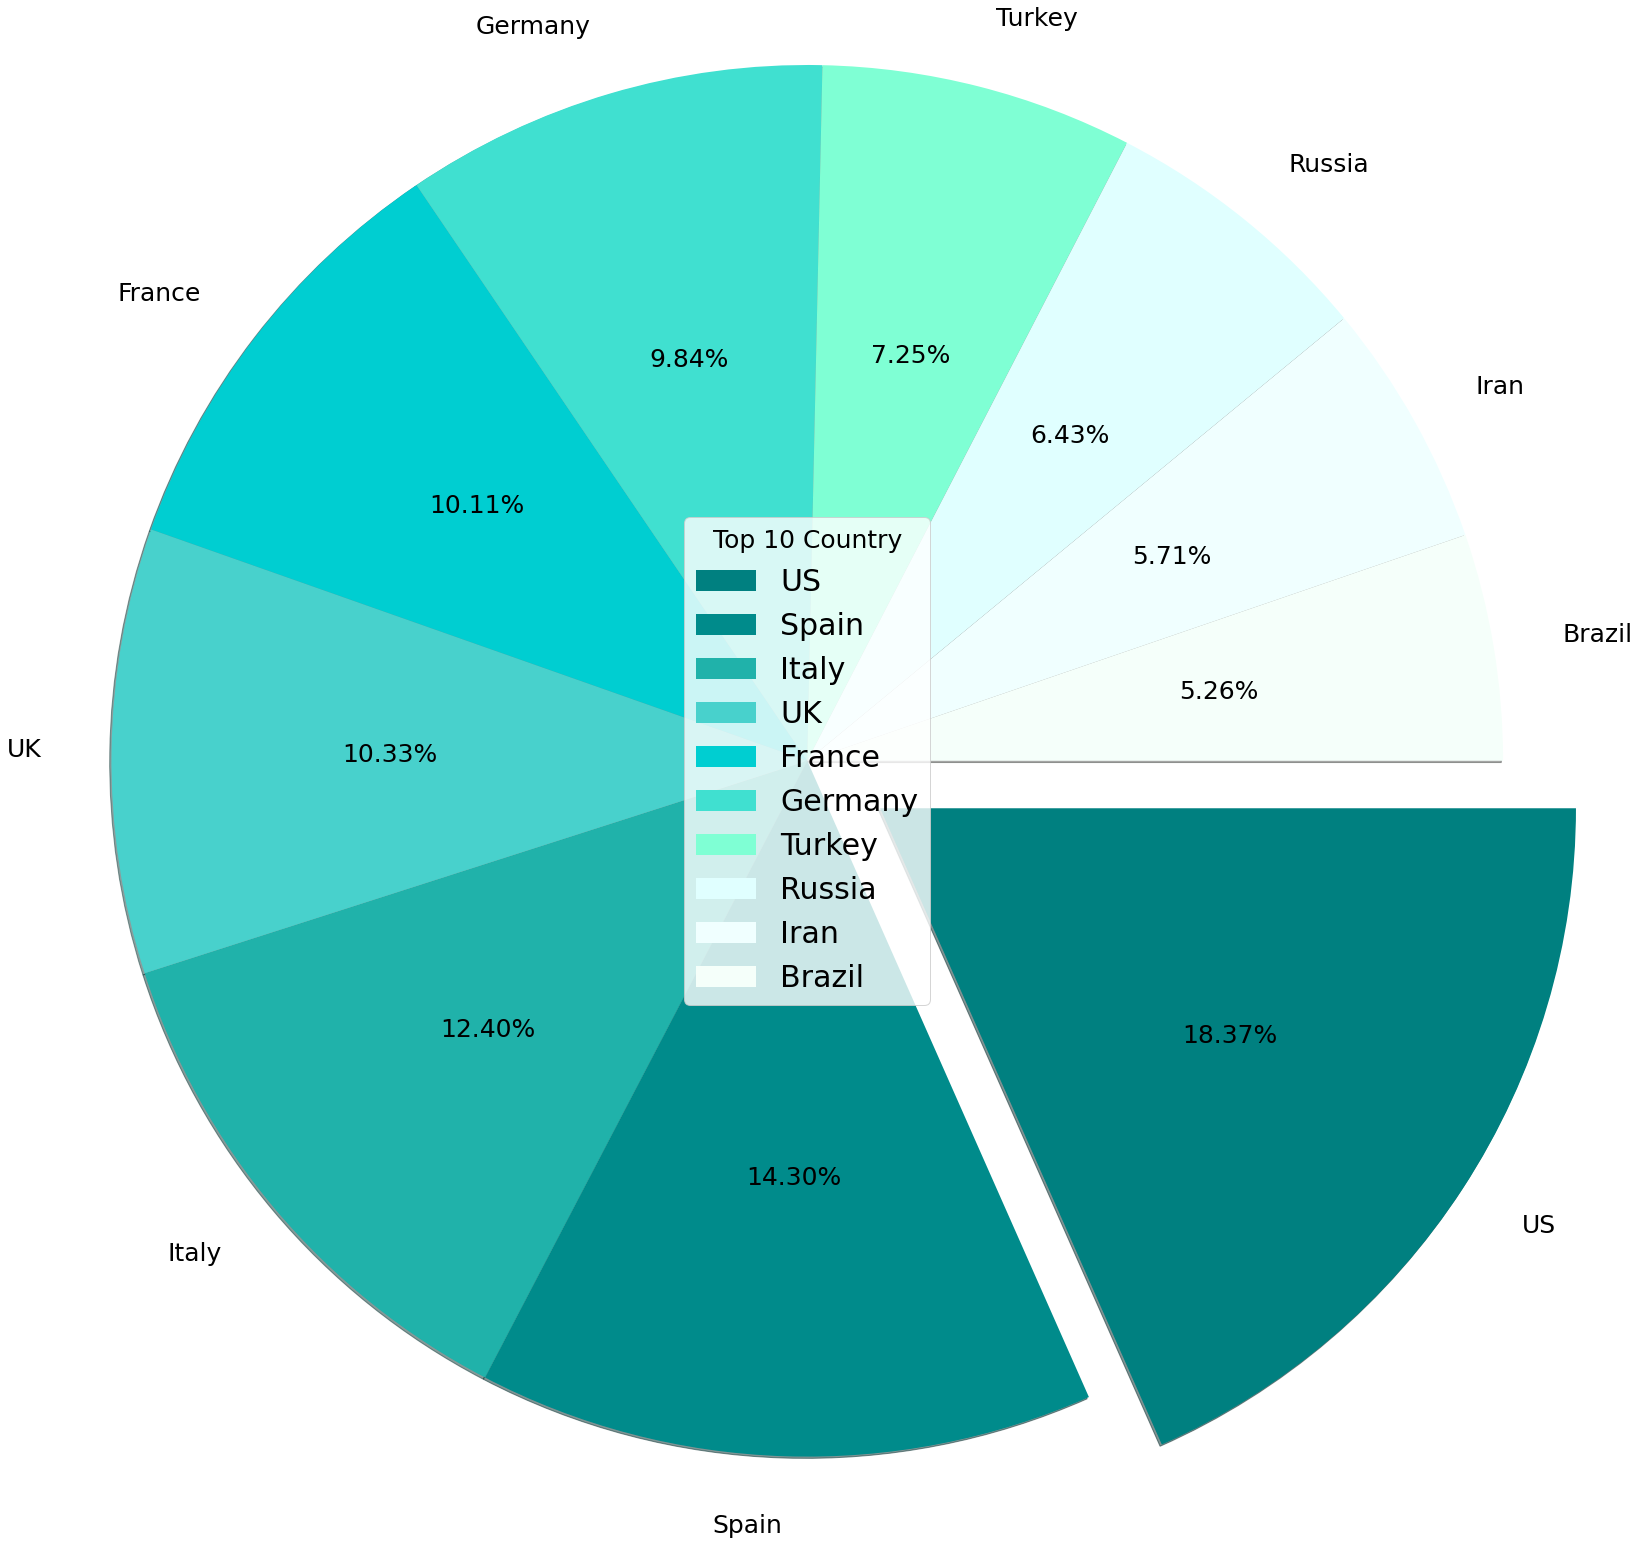

In [67]:
plt.rcParams.update({'font.size': 25})

values = ig2_values
colors = ['teal','darkcyan','lightseagreen','mediumturquoise','darkturquoise',
          'turquoise','aquamarine','lightcyan','azure','mintcream']
labels = ig2_index
# move the second value section out of the chart. The higher the number the farther it gets moved
explode = (1, 0, 0, 0, 0, 0,0, 0, 0, 0)

# autopct the %.1f is Python formating and %% used to show as percent
plt.pie(values, colors=colors, labels=labels,radius=8,
        explode=explode, autopct='%.2f%%',
        counterclock=False, shadow=True)

plt.legend( labels, loc="center",fontsize=30,title="Top 10 Country")
plt.show()

# Fact number 5:
## Within April 1st to April 30th, the top 10 country with the most confirmed cases is US, Spain,Italty, UK, France, Germany, Turkey, Russia,Iran,Brazli.

In [63]:
ga=cp[cp['Country/Region']=="US"] #Filter CP to the region US ONLY
ga=ga[ga['Province/State']=="Georgia"]  #Filter State to Georgia ONLY
boolean=(ga['Date'] > '04/01/2020') & (ga['Date'] <= '04/30/2020') #Boolean filter Kinda like a mask of true and false
ga=ga.loc[boolean] # Apply it to the df, and only show the one that are true
values=ga['Confirmed'].values # Get the values , put it in a array
total_cp=ga['Confirmed'].sum() # Get the total of it 
days = np.arange(1,30) #Generate number 1 to 29
#-----------------------------------------------------------------
new_values_cp=(values/total_cp)*100
new_values_cp

array([1.15947056, 1.26418715, 1.33551583, 1.44109963, 1.58570825,
       1.91264946, 2.14658153, 2.29075654, 2.48999989, 2.63612614,
       2.69964986, 2.88675216, 3.16057627, 3.24924931, 3.39711   ,
       3.72773689, 3.83071903, 3.96773949, 4.20752528, 4.31029063,
       4.59929105, 4.74433327, 4.87615042, 5.03463452, 5.09187091,
       5.2687834 , 5.4032022 , 5.58813646, 5.69415387])

In [64]:
us_ct=ct[ct['Country']=='United States of America (the)'] # Filter to US 
ga_ct=us_ct[us_ct['State']=='Georgia'] # filter to GA
boolean_ga_ct=(ga_ct['Date'] > '04/01/2020') & (ga_ct['Date'] <= '04/30/2020') # Boolean masking
date_ct=ga_ct.loc[boolean_ga_ct] # using Loc to match the series of true and false loc for boolean array
sorted_date=date_ct.sort_values(by='Date') # sorting the dates 
values_ct=sorted_date['PercentOfBaseline'].values #Get all the values and out it in an array order by dates
total_ct=sorted_date['PercentOfBaseline'].sum() #Get the total 
days_ct=np.arange(1,30) #Generate number 1 to 29
new_values_ct=(values_ct/total_ct)*100
new_values_ct

array([4.07790627, 3.59099209, 3.53012781, 2.92148509, 3.40839927,
       3.83444918, 3.77358491, 3.95617772, 3.71272063, 3.71272063,
       2.55629945, 3.40839927, 3.46926354, 3.28667072, 3.65185636,
       3.46926354, 3.71272063, 2.86062082, 3.10407791, 3.77358491,
       3.53012781, 3.22580645, 3.347535  , 3.22580645, 2.92148509,
       3.04321363, 3.83444918, 3.71272063, 3.347535  ])

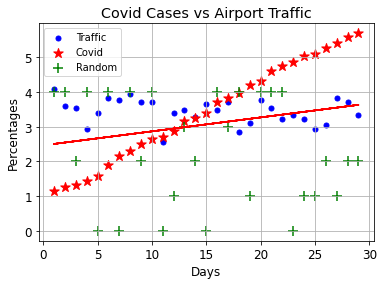

In [65]:
plt.rcParams.update({'font.size': 12})
plt.title('Covid Cases vs Airport Traffic')
x1= days
x2= days_ct
x3= np.arange(1,30)
x = np.concatenate((x1,x2,x3))
#-------------------------
y1 = new_values_ct #Taffic
y2 = new_values_cp #Covid
y3=  np.random.randint(5, size=29)
y = np.concatenate((y1,y2,y3))
color_array = ['b', 'r', 'g']
#------------------------------------------------
traffic_plot=plt.scatter(x1,y1,s=[100], marker='.',color=color_array[0])
covid_plot=plt.scatter(x2,y2,s=[100], marker='*',color=color_array[1])
random_plot=plt.scatter(x3,y3,s=[100], marker='+',color=color_array[2])
#---------------------------------------------------------------
z = np.polyfit(x, y, 1)
p = np.poly1d(z) 
#---------------------------------------------------
plb.plot(x, p(x), 'r-')
plt.legend((traffic_plot,covid_plot,random_plot),('Traffic','Covid','Random'),scatterpoints=1,loc='upper left',fontsize=10)
plt.xlabel('Days')
plt.ylabel('Percentages')
plt.grid(True)
plt.show()


# Fact number 6:
## Accoridng to the graphs above, the volume of airport traffic from Hartsfield-Jackson and the covid cases amount per a day does not have a strong  correlation with each other.